In [39]:
from model_wrapper import model_wrapper as mw
import constants as co
from data_transformers import read_in_pipeline, create_molecular_features, process_molecular_features
import json
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
pd.set_option("display.max_rows", 1000)

In [22]:
t_conf_file = co.TRAINING_CONF_DIR/"mean_100/svm_classification_Morgan_1024_pca_512_QED.json"
with open(t_conf_file.as_posix(), "r") as f:
    training_params = json.load(f)
training_params

{'prediction_methodology': 'M_SVM',
 'prediction_type': 'classification',
 'GPU_support': False,
 'training_aux_data': {'run_name': 'test',
  'n_outer': 1,
  'n_cv': 4,
  'development': False,
  'goal_function': 'precision',
  'goal_function_multiplier': -1.0,
  'threshold': 0.5,
  'track_model': False,
  'experiment': None,
  'comment': None,
  'max_evals': 200,
  'pipeline_file': 'svm/pipeline_configuration_svm_classification_Morgan_1024_pca_512_QED.json'},
 'data_preparation': {'data_file': 'ror_gamma_homo_sapiens_chembl_3.0_IC50.csv',
  'max_level_activity': 15,
  'std_threshold': 100,
  'strategy': 'mean'},
 'model_storage': {'resulting_model': 'model_svm_classifier_Morgan_1024_pca_512_QED_mean_100.model'}}

In [23]:
pipeline_configuration = read_in_pipeline(pipeline_file=training_params["training_aux_data"]["pipeline_file"], pipeline_directory=co.PIPELINE_DIR)
m_c = mw.M_SVM(prediction_type=training_params["prediction_type"], pipeline_configuration=pipeline_configuration)
model_file = (co.MODEL_DIR/training_params["model_storage"]["resulting_model"]).as_posix()
m_c.Load(model_file)

smiles_codes_train = m_c.Data["smiles_codes_train"]
m_c.Pipeline.fit(X=smiles_codes_train, y=None)

2022-07-29 17:11:57,993 - logger - INFO - Scaler constructor...
2022-07-29 17:11:57,994 - logger - INFO - PCA constructor...
2022-07-29 17:11:58,003 - logger - INFO - Scaler constructor...
2022-07-29 17:11:58,004 - logger - INFO - PCA constructor...
2022-07-29 17:11:58,004 - logger - INFO - CreateFPS fit...
2022-07-29 17:11:58,005 - logger - INFO - CreateFPS transform...
100%|██████████| 2005/2005 [00:03<00:00, 541.56it/s]
2022-07-29 17:12:05,210 - logger - INFO - Scaler fit...
2022-07-29 17:12:05,218 - logger - INFO - Scaler transform...
2022-07-29 17:12:05,228 - logger - INFO - Scaler fit...


Pipeline(steps=[('Molecular features',
                 TurnSmilesIntoFeatures(chosen_descriptors=[<module 'mordred.SLogP' from '/home/rafalb/miniconda3/envs/rorgammaqsar/lib/python3.8/site-packages/mordred/SLogP.py'>,
                                                            mordred.RingCount.RingCount(None, False, False, True, None),
                                                            <class 'mordred.HydrogenBond.HBondAcceptor'>,
                                                            <class 'mordred.HydrogenBond.HBondDonor'>,
                                                            <class 'mordre...
                             scaling_features=['SLogP', 'SMR', 'naRing',
                                               'nHBAcc', 'nHBDon', 'nRot', 'MW',
                                               'TopoPSA', 'QED'])),
                ('PCA',
                 DataPCA(n_components=512,
                         pca_features_names=['fp_0', 'fp_1', 'fp_2', 'fp_3',
                                             'fp_4', 'fp_5', 'fp_6', 'fp_7',
                                             'fp_8', 'fp_9', 'fp_10', 'fp_11',
                                             'fp_12', 'fp_13', 'fp_14', 'fp_15',
                                             'fp_16', 'fp_17', 'fp_18', 'fp_19',
                                             'fp_20', 'fp_21', 'fp_22', 'fp_23',
                                             'fp_24', 'fp_25', 'fp_26', 'fp_27',
                                             'fp_28', 'fp_29', ...]))])

In [34]:
# digoxin-similar
# sm = ["C[C@H]1O[C@@H](O[C@@H]2[C@H](O)C[C@@H](O[C@@H]3[C@H](O)C[C@@H](O[C@H]4CC[C@@]5(C)[C@@H](CC[C@H]6[C@H]5CC[C@]5(C)[C@H](C7=CC(=O)OC7)CC[C@]65O)C4)O[C@@H]3C)O[C@@H]2C)C[C@H](O)[C@@H]1O",
#       "C[C@@H]1O[C@H](O[C@@H]2[C@H](O)C[C@H](O[C@@H]3[C@H](O)C[C@H](O[C@@H]4CC[C@]5(C)[C@H]6CC[C@]7(C)[C@H](C8=CC(=O)OC8)[C@H](O)C[C@@]7(O)[C@@H]6CC[C@@H]5C4)O[C@@H]3C)O[C@@H]2C)C[C@@H](O)[C@@H]1O",
#       "C[C@@H]1O[C@H](O[C@@H]2CC[C@]3(C)[C@H]4C[C@H](O)[C@]5(C)[C@H](C6=CC(=O)OC6)CC[C@@]5(O)[C@@H]4CC[C@@H]3C2)C[C@H](O)[C@H]1O[C@@H]1C[C@H](O)[C@@H](O[C@@H]2C[C@H](O)[C@@H](O[C@H]3O[C@H](CO)[C@H](O)[C@@H](O)[C@@H]3O)[C@H](C)O2)[C@H](C)O1",
#       "CC(=O)O[C@@H]1C[C@H](O[C@@H]2[C@H](O)C[C@@H](O[C@@H]3[C@H](O)C[C@@H](O[C@@H]4CC[C@]5(C)[C@H]6C[C@H](O)[C@]7(C)[C@H](C8=CC(=O)OC8)CC[C@@]7(O)[C@@H]6CC[C@@H]5C4)O[C@@H]3C)O[C@@H]2C)O[C@H](C)[C@H]1O[C@H]1O[C@H](CO)[C@H](O)[C@@H](O)[C@@H]1O",
#       "C[C@@H]1O[C@H](O[C@@H]2CC[C@]3(C)[C@H]4C[C@H](O)[C@]5(C)[C@H](C6=CC(=O)OC6)CC[C@]5(O)[C@@H]4CC[C@@H]3C2)C[C@H](O)[C@H]1O[C@@H]1C[C@H](O)[C@@H](O[C@@H]2C[C@H](O)[C@@H](O[C@H]3O[C@H](CO)[C@H](O)[C@@H](O)[C@@H]3O)[C@H](C)O2)[C@H](C)O1",
#       "C[C@H]1O[C@@H](O[C@H]2CC[C@]3(C)[C@H]4C[C@@H](O)[C@]5(C)[C@@H](C6=CC(=O)OC6)CC[C@]5(O)[C@@H]4CC[C@@H]3C2)C[C@H](O)[C@@H]1O",
#       "CC(=O)O[C@H]1C[C@H](O[C@@H]2[C@@H](O)C[C@H](O[C@@H]3[C@@H](O)C[C@H](O[C@@H]4CC[C@]5(C)[C@H]6C[C@@H](O)[C@]7(C)[C@H](C8=CC(=O)OC8)CC[C@]7(O)[C@@H]6CC[C@@H]5C4)O[C@@H]3C)O[C@@H]2C)O[C@H](C)[C@H]1O",
#       "C[C@H]1O[C@@H](O[C@H]2CC[C@]3(C)[C@@H](CC[C@H]4[C@H]3C[C@H](O)[C@@]3(C)[C@H](C5=CC(=O)OC5)CC[C@]43O)C2)C[C@H](O)[C@@H]1O[C@@H]1C[C@H](O)[C@@H](O[C@@H]2C[C@H](O)[C@@H](O[C@H]3O[C@@H](CO)[C@H](O)[C@@H](O)[C@@H]3O)[C@@H](C)O2)[C@@H](C)O1"]
# ursolic-similar
# ZINC257511791, ZINC14980299, ZINC49708319, ZINC257400456, ZINC257808147, ZINC8952030
sm  = ["CC(=O)O[C@@H]1CC[C@]2(C)[C@H](CC[C@]3(C)[C@@H]2CC=C2[C@@H]4[C@H](C)[C@H](C)CC[C@@]4(C(=O)O)CC[C@@]23C)C1(C)C",
       "C[C@@H]1[C@H]2C3=CC[C@@H]4[C@@]5(C)CCC(=O)C(C)(C)[C@H]5CC[C@@]4(C)[C@]3(C)CC[C@@]2(C(=O)O)CC[C@H]1C",
       "C[C@@H]1[C@H]2C3=CC[C@@H]4[C@@]5(C)C[C@H](O)[C@@H](O)C(C)(C)[C@@H]5CC[C@@]4(C)[C@]3(C)CC[C@@]2(C(=O)O)CC[C@H]1C",
       "C[C@@H]1[C@H](O)C[C@]2(C(=O)O)CC[C@]3(C)C(=CC[C@@H]4[C@]5(C)CC[C@H](O)C(C)(C)[C@@H]5CC[C@@]43C)[C@H]2[C@H]1C",
       "C[C@@H]1CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC[C@@H]4[C@]5(C)CC[C@H](O)C(C)(C)[C@@H]5CC[C@@]43C)[C@H]2[C@]1(C)O",
       "COC(=O)[C@]12CC[C@@H](C)[C@H](C)[C@H]1C1=CC[C@H]3[C@@]4(C)CC[C@@H](O)C(C)(C)[C@H]4CC[C@@]3(C)[C@]1(C)CC2"]
sm = pd.Series(sm)

In [35]:
X = create_molecular_features(pipeline=m_c.Pipeline, smiles_codes=sm)
X = process_molecular_features(pipeline=m_c.Pipeline, X=X)

2022-07-29 17:20:22,149 - logger - INFO - CreateFPS fit...
2022-07-29 17:20:22,150 - logger - INFO - CreateFPS transform...
100%|██████████| 6/6 [00:00<00:00, 464.06it/s]
2022-07-29 17:20:22,203 - logger - INFO - Scaler transform...
2022-07-29 17:20:22,207 - logger - INFO - PCA transform...


In [36]:
X

,GhoseFilter,Lipinski,MW,QED,SLogP,SMR,TopoPSA,nHBAcc,nHBDon,nRot,...,pca_502,pca_503,pca_504,pca_505,pca_506,pca_507,pca_508,pca_509,pca_510,pca_511
0,0,0,-0.250741,-0.714298,1.899711,0.617320,-1.051812,-1.240651,-0.087054,-2.189223,...,-0.026315,0.029017,-0.015146,-0.226609,0.021421,0.054592,-0.037953,-0.130439,0.189126,-0.115401
1,0,0,-0.618454,-0.069627,1.637043,0.126154,-1.359163,-1.895948,-0.087054,-2.672423,...,0.003620,0.035504,-0.094740,-0.077572,0.151244,0.047257,-0.251575,-0.273802,0.013793,-0.137975
2,0,0,-0.468027,-0.173032,0.740669,0.237436,-0.580297,-1.240651,2.240191,-2.672423,...,-0.202800,0.011031,-0.067693,-0.120149,-0.082968,-0.098024,-0.342810,-0.222099,0.000562,-0.006262
3,0,0,-0.468027,-0.173032,0.740669,0.237436,-0.580297,-1.240651,2.240191,-2.672423,...,-0.115126,0.130997,-0.139013,-0.086997,-0.079872,0.119205,-0.361885,-0.176681,0.286181,-0.122722
4,0,0,-0.468027,-0.223378,0.845055,0.240695,-0.580297,-1.240651,2.240191,-2.672423,...,-0.061505,0.095759,-0.357511,-0.034610,-0.011616,-0.036810,-0.251372,-0.307528,0.384764,-0.052328
5,0,0,-0.484558,-0.639999,1.550260,0.376697,-1.620229,-1.240651,-0.087054,-2.672423,...,-0.032765,-0.022792,-0.007355,0.037830,-0.015788,0.054650,-0.306067,-0.021589,0.284578,-0.054979


In [37]:
m_c.Predict(X)

0    0.595644
1    0.522866
2    0.440981
3    0.407386
4    0.425260
5    0.550593
dtype: float64

In [25]:
candidates = pd.read_csv(co.DATA_DIR_CANDIDATES/"chosen_ligands_with_smiles_digo_urso_hydroxychole_0.70.csv")
candidates.head()

,query_id,target_id,score,file,smiles
0,digoxin,254855762,0.813333,KGAA.fpb,C[C@H]1O[C@@H](O[C@@H]2[C@H](O)C[C@@H](O[C@@H]...
1,digoxin,254855755,0.813333,KGAA.fpb,C[C@H]1O[C@@H](O[C@@H]2[C@H](O)C[C@@H](O[C@@H]...
2,digoxin,1775964726,0.813333,KGAA.fpb,C[C@@H]1O[C@@H](O[C@@H]2[C@H](O)C[C@H](O[C@@H]...
3,digoxin,254855752,0.813333,KGAA.fpb,C[C@H]1O[C@@H](O[C@@H]2[C@H](O)C[C@@H](O[C@@H]...
4,digoxin,1775964723,0.813333,KGAA.fpb,C[C@@H]1O[C@@H](O[C@@H]2[C@H](O)C[C@H](O[C@@H]...


In [26]:
X = create_molecular_features(pipeline=m_c.Pipeline, smiles_codes=candidates["smiles"])
X = process_molecular_features(pipeline=m_c.Pipeline, X=X)

2022-07-29 17:12:31,332 - logger - INFO - CreateFPS fit...
2022-07-29 17:12:31,333 - logger - INFO - CreateFPS transform...
100%|██████████| 432/432 [00:00<00:00, 464.99it/s]
2022-07-29 17:12:33,120 - logger - INFO - Scaler transform...
2022-07-29 17:12:33,127 - logger - INFO - PCA transform...


In [27]:
candidates["activity_proba"] = m_c.Predict(X)

In [31]:
candidates.sort_values("activity_proba", ascending=False).head()

,query_id,target_id,score,file,smiles,activity_proba
259,ursolic acid,118081009,0.727273,KKAC.fpb,C[C@@H]1[C@H]2C3=CC[C@@H]4[C@@]5(C)CC[C@H](O)C...,0.616338
394,ursolic acid,17434116,0.754098,JKAA.fpb,CC(=O)O[C@H]1CC[C@@]2(C)[C@@H](CC[C@]3(C)[C@@H...,0.595644
393,ursolic acid,59337582,0.754098,JKAA.fpb,CC(=O)O[C@H]1CC[C@@]2(C)[C@H](CC[C@]3(C)[C@@H]...,0.595644
15,ursolic acid,257511789,0.754098,JKAC.fpb,CC(=O)O[C@@H]1CC[C@]2(C)[C@H](CC[C@]3(C)[C@@H]...,0.595644
14,ursolic acid,257511790,0.754098,JKAC.fpb,CC(=O)O[C@@H]1CC[C@]2(C)[C@H](CC[C@]3(C)[C@@H]...,0.595644


In [30]:
candidates.sort_values("activity_proba", ascending=False).to_csv(co.DATA_DIR_CANDIDATES/"chosen_ligands_with_smiles_digo_urso_hydroxychole_0.70_with_proba.csv", index=False)

In [40]:
smi = ["C[C@@H]1[C@H]2C3=CC[C@@H]4[C@@]5(C)CC[C@H](O)C(C)(C)[C@@H]5CC[C@@]4(C)[C@]3(C)CC[C@@]2(C(=O)OCc2ccccc2)CC[C@H]1C", "C[C@@H]1CC[C@@]2(CC[C@@]3(C(=CC[C@H]4[C@]3(CC[C@@H]5[C@@]4(CC[C@@H](C5(C)C)O)C)C)[C@@H]2[C@H]1C)C)C(=O)O"]
mols = [Chem.MolFromSmiles(item) for item in smi]

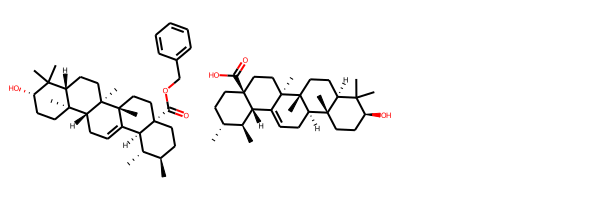

In [41]:
Draw.MolsToGridImage(mols)

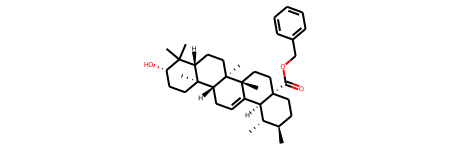

In [42]:
mols[0]

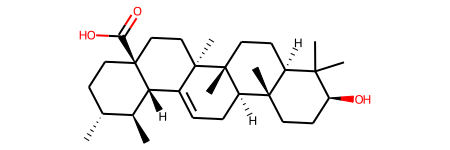

In [43]:
mols[1]